## Exercise Session 4

Note: <span style="color:red">you don't need to use RDFlib for this exercise. </span>

### Querying the DBpedia knowledge base. 

Provide SPARQL queries to answer the following questions. 


1- Is Mount Kilimanjaro taller than mount Everest? (Hint: ASK query)

In [1]:
import rdflib
g = rdflib.ConjunctiveGraph('SPARQLStore')
g.open('http://dbpedia.org/sparql')

In [2]:
query="""
PREFIX dbo: <http://dbpedia.org/ontology/>

ASK WHERE {
    <http://dbpedia.org/resource/Mount_Kilimanjaro> dbo:elevation ?x .
    <http://dbpedia.org/resource/Mount_Everest> dbo:elevation ?y .

    FILTER (?x > ?y)
}
"""

qresult = g.query(query)

In [3]:
qresult.askAnswer

False

2- What are the top 5 highest mountains in the world?

In [5]:
query="""
    SELECT distinct ?x WHERE {
        ?x rdf:type dbo:Mountain .
        ?x dbo:elevation ?y . 
    }
    ORDER BY DESC(?y) 
    LIMIT 5
"""

qresult = g.query(query)
for row in qresult:
    print(row[0])

http://dbpedia.org/resource/Alpide_belt
http://dbpedia.org/resource/Himalayas
http://dbpedia.org/resource/Mahalangur_Himal
http://dbpedia.org/resource/Karakoram
http://dbpedia.org/resource/Kangchenjunga


3- Select 10 politicians who were born in Utrecht.

In [6]:
query="""
    SELECT ?person WHERE {
        ?person dbo:birthPlace dbr:Utrecht .
        ?person rdf:type yago:Politician110450303 . 
    }
    LIMIT 10
"""

qresult = g.query(query)
for row in qresult:
    print(row[0])

http://dbpedia.org/resource/Boris_Dittrich
http://dbpedia.org/resource/Peter_Ester
http://dbpedia.org/resource/Rita_Verdonk
http://dbpedia.org/resource/Frans_Andriessen
http://dbpedia.org/resource/Godert_van_der_Capellen
http://dbpedia.org/resource/Theo_van_Lynden_van_Sandenburg
http://dbpedia.org/resource/Anja_Meulenbelt
http://dbpedia.org/resource/Stientje_van_Veldhoven
http://dbpedia.org/resource/Titus_van_Asch_van_Wijck
http://dbpedia.org/resource/Edith_Schippers


4- Select footballers born in the Netherlands that manage a team that they played for.

In [9]:
query = """
    SELECT distinct ?person WHERE {
        ?person dbo:birthPlace dbr:Netherlands .
        ?person rdf:type yago:FootballPlayer110101634 .
        ?person dbo:team ?team .
        ?person dbo:managerClub ?team .
    }
    LIMIT 10
"""

qresult = g.query(query)
for row in qresult:
    print(row[0])

http://dbpedia.org/resource/Carlo_l'Ami
http://dbpedia.org/resource/Robin_van_der_Laan
http://dbpedia.org/resource/Roger_Reijners
http://dbpedia.org/resource/Sandor_van_der_Heide
http://dbpedia.org/resource/Dennis_van_Wijk
http://dbpedia.org/resource/Joop_Hiele
http://dbpedia.org/resource/Joop_Lankhaar
http://dbpedia.org/resource/Joop_van_Daele
http://dbpedia.org/resource/Jos_van_Eck
http://dbpedia.org/resource/Paul_Beekmans


5- Construct an RDF graph with all the names of graduates (alma mater) of Utrecht university.

In [14]:
cquery="""
    CONSTRUCT {
        ?person foaf:name ?name . 
    }
    WHERE {
        ?person dbo:almaMater dbr:Utrecht_University .
        ?person foaf:name ?name
        FILTER(lang(?name)='en')
    } 
    LIMIT 10
"""
qresult = g.query(cquery)
for row in qresult:
    print(row[0], row[1], row[0])

http://dbpedia.org/resource/Roel_Vertegaal http://xmlns.com/foaf/0.1/name http://dbpedia.org/resource/Roel_Vertegaal
http://dbpedia.org/resource/Sander_Terphuis http://xmlns.com/foaf/0.1/name http://dbpedia.org/resource/Sander_Terphuis
http://dbpedia.org/resource/Ben_Verwaayen http://xmlns.com/foaf/0.1/name http://dbpedia.org/resource/Ben_Verwaayen
http://dbpedia.org/resource/Bas_Belder http://xmlns.com/foaf/0.1/name http://dbpedia.org/resource/Bas_Belder
http://dbpedia.org/resource/Bart_Smals http://xmlns.com/foaf/0.1/name http://dbpedia.org/resource/Bart_Smals
http://dbpedia.org/resource/Roel_Vermeulen http://xmlns.com/foaf/0.1/name http://dbpedia.org/resource/Roel_Vermeulen
http://dbpedia.org/resource/Ben_Swagerman http://xmlns.com/foaf/0.1/name http://dbpedia.org/resource/Ben_Swagerman
http://dbpedia.org/resource/Schelto_Patijn http://xmlns.com/foaf/0.1/name http://dbpedia.org/resource/Schelto_Patijn
http://dbpedia.org/resource/Bert_Röling http://xmlns.com/foaf/0.1/name http://dbpe

### Querying WIKIDATA

Provide SPARQL queries to answer the following questions. 


1- List French names of Dutch cities.

In [1]:
import rdflib 

g = rdflib.ConjunctiveGraph('SPARQLStore')
g.open('https://query.wikidata.org/sparql')

In [2]:
query="""
    SELECT ?cityLabel 
    WHERE {
        ?city wdt:P31 wd:Q515 ;
              wdt:P17 wd:Q55 ; 
              rdfs:label ?cityLabel .
        FILTER (lang(?cityLabel)="fr")
    }
"""

qresult = g.query(query)
for row in qresult:
    print(row[0])

Groningue
Sneek
Ruremonde
Helmond
Haarlem
Tilbourg
Enkhuizen
Purmerend
Amsterdam
Weesp
Dorestad
Assen
Appingedam
Wageningue
Hengelo
Kampen
Maastricht
IJsselstein
Vianen
Arnhem
Maassluis
Ryswick
Zoetermeer
Rotterdam
Dordrecht
La Haye
Bréda
Leyde
Middelbourg
Leeuwarden
Nimègue
Edam
Almere
Zutphen
Doesburg
Voorburg
Culemborg
Lelystad
Flardingue
Berg-op-Zoom
Schiedam
Hattem
Delfzijl
Leerdam
Meppel
Sittard
Heerenveen
Rosmalen
Ede
Reimerswaal
Bois-le-Duc
Apeldoorn
Bolsward
Venlo
Rosendael
Nimègue
Rincon (Bonaire)
Doetinchem
Lochem
Nijkerk
Alkmaar
Flessingue
Utrecht
Assen
Deventer
Kerkrade
Almelo
Amersfoort
Den Helder
Gouda


2- List the top 10 highest grossing movies of all time.

In [4]:
query2="""
    SELECT DISTINCT ?item ?boxoffice ?label 
    WHERE {
        ?item wdt:P31 wd:Q11424.
        ?item wdt:P2142 ?boxoffice.
        ?item rdfs:label ?label . 
        FILTER (lang(?label) = 'en')
    }
    ORDER BY DESC(?boxoffice)
    LIMIT 10
"""
qresult2 = g.query(query2)
for row in qresult2:
    print(row[0], row[1], row[2])

http://www.wikidata.org/entity/Q32362264 910368390000000 Yolki 6
http://www.wikidata.org/entity/Q23562553 268533313000000 The Flash
http://www.wikidata.org/entity/Q2602481 722135000000 The House with Laughing Windows
http://www.wikidata.org/entity/Q116442403 384000000000 The House of No Man
http://www.wikidata.org/entity/Q3232239 196657000000 Shock
http://www.wikidata.org/entity/Q17039529 80040000000 Umizaru 3: The Last Message
http://www.wikidata.org/entity/Q85967437 77586450000 Solitary
http://www.wikidata.org/entity/Q601365 69541000000 Crypt of the Vampire
http://www.wikidata.org/entity/Q65195735 58178370740 Dynamite
http://www.wikidata.org/entity/Q85971973 34135121094 Sagband


3- Find the names of video games set on Mars. 

In [6]:
query3 = """
    SELECT ?vg ?vgLabel
    WHERE
    {
      ?vg wdt:P31 wd:Q7889 .
        ?vg wdt:P840 wd:Q111 .
        ?vg rdfs:label ?vgLabel .
        FILTER(lang(?vgLabel)="en")
   }
"""
qresult3 = g.query(query3)
for row in qresult3:
    print(row[0], row[1])

http://www.wikidata.org/entity/Q48767929 Project Eagle
http://www.wikidata.org/entity/Q55662649 Doom Eternal
http://www.wikidata.org/entity/Q60740631 Destiny 2 post-release content
http://www.wikidata.org/entity/Q93875174 Looney Tunes: Galactic Sports
http://www.wikidata.org/entity/Q107303968 PowerWash Simulator
http://www.wikidata.org/entity/Q144559 Zak McKracken and the Alien Mindbenders
http://www.wikidata.org/entity/Q189784 Doom
http://www.wikidata.org/entity/Q210275 Destiny
http://www.wikidata.org/entity/Q30015130 Far Cry 5
http://www.wikidata.org/entity/Q30590859 Cydonia: Mars - The First Manned Mission
http://www.wikidata.org/entity/Q30639185 Surviving Mars
http://www.wikidata.org/entity/Q286205 Wipeout
http://www.wikidata.org/entity/Q537071 Martian Memorandum
http://www.wikidata.org/entity/Q753511 Mass Effect 3
http://www.wikidata.org/entity/Q23253765 Offworld Trading Company
http://www.wikidata.org/entity/Q23978200 Call of Duty: Infinite Warfare
http://www.wikidata.org/entity/

### Working with Triple stores

#### BlazeGraph 

For the lecture on Wednesday, please download and set up Blazegraph. You can download blazegraph.jar at this address: https://github.com/blazegraph/database/releases/tag/BLAZEGRAPH_2_1_6_RC 

Alternatively, if you’re on Linux, you can download and use .rpm or .deb versions depending on the distribution that you’re using. 

 

In order to run blazegraph.jar from the command line, you need Java version 9 and above. You can start Blazegraph by executing the following command at the prompt.


	
 `java -jar blazegraph.jar`


By default, the application runs on port 9999, you can change that by adding `-server -Djetty.port=8080` to the above command. 

 

When Blazegraph starts, it will provide you a URL address which looks like http://127.0.0.1:9999/blazegraph.  When you open this address in a Web browser, you should see the welcome page.

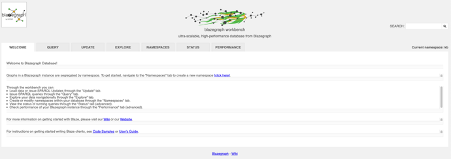

Follow the instructions on the welcome page to upload a dataset and start querying.  To start with, you can upload the dataset noblepize.nt. You can find some documentation about the dataset and sample queries at the addresses https://data.nobelprize.org/specification/ ,  https://data.nobelprize.org/terms/ and https://www.nobelprize.org/about/linked-data-examples/ 

Provide at least 3 interesting SPARQL queries for the Nobel prize dataset. 

For instance, 
1. Who is the youngest Nobel Prize winner? 
2. Which country has the largest number of Nobel Prize-winning nationals? etc.
